<a href="https://colab.research.google.com/github/Zunuoh/Dengue-Fever-Prediction/blob/main/New_Dengue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('dengue_data_with_weather_data.csv')
df.head()

,Year,Province,District,Latitude,Longitude,Elevation,Month,Cases,Temp_avg,Precipitation_avg,Humidity_avg
0,2019,Western,Colombo,6.924429,79.90725,4,1,1225,26.914286,0.771429,72.607143
1,2019,Western,Gampaha,7.065026,79.96622,19,1,724,27.417857,0.728571,69.892857
2,2019,Western,Kalutara,6.572935,80.02519,5,1,372,26.112500,1.396429,80.464286
3,2019,Central,Kandy,7.275923,80.62659,499,1,288,22.067857,1.853571,83.428571
4,2019,Central,Matale,7.486819,80.52632,362,1,62,25.592857,0.850000,74.285714


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,900.000,2020.000,0.817,2019.000,2019.000,2020.000,2021.000,2021.000
Latitude,900.000,7.588,1.032,5.940,6.924,7.276,8.330,9.666
Longitude,900.000,80.587,0.521,79.846,80.234,80.526,81.015,81.693
Elevation,900.000,173.200,383.128,4.000,8.000,19.000,129.000,1865.000
Month,900.000,6.500,3.454,1.000,3.750,6.500,9.250,12.000
Cases,900.000,190.258,407.360,0.000,13.000,51.000,164.250,4217.000
Temp_avg,899.000,26.645,2.969,14.734,25.868,26.895,28.453,31.777
Precipitation_avg,899.000,5.297,4.637,0.093,1.629,3.879,7.709,25.182
Humidity_avg,899.000,80.403,6.779,60.357,75.589,81.821,85.661,94.357


In [ ]:
df.isnull().sum()

,0
Year,0
Province,0
District,0
Latitude,0
Longitude,0
Elevation,0
Month,0
Cases,0
Temp_avg,1
Precipitation_avg,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               900 non-null    int64  
 1   Province           900 non-null    object 
 2   District           900 non-null    object 
 3   Latitude           900 non-null    float64
 4   Longitude          900 non-null    float64
 5   Elevation          900 non-null    int64  
 6   Month              900 non-null    int64  
 7   Cases              900 non-null    int64  
 8   Temp_avg           899 non-null    float64
 9   Precipitation_avg  899 non-null    float64
 10  Humidity_avg       899 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 77.5+ KB


In [ ]:
df['Province'] = df['Province'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               900 non-null    int64   
 1   Province           900 non-null    category
 2   District           900 non-null    object  
 3   Latitude           900 non-null    float64 
 4   Longitude          900 non-null    float64 
 5   Elevation          900 non-null    int64   
 6   Month              900 non-null    int64   
 7   Cases              900 non-null    int64   
 8   Temp_avg           899 non-null    float64 
 9   Precipitation_avg  899 non-null    float64 
 10  Humidity_avg       899 non-null    float64 
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 71.7+ KB


In [ ]:
df = pd.get_dummies(df, columns=['Province', 'District'], drop_first=True)

In [ ]:
X = df.drop(['Cases', 'Year'], axis=1)
y = df['Cases']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
province_columns = [col for col in df.columns if col.startswith('Province_')]
province_cases = df[province_columns].multiply(df['Cases'], axis=0).sum()
province_cases = province_cases.reset_index()
province_cases.columns = ['Province', 'Total Cases']


district_columns = [col for col in df.columns if col.startswith('District_')]
district_cases = df[district_columns].multiply(df['Cases'], axis=0).sum()
district_cases = district_cases.reset_index()
district_cases.columns = ['District', 'Total Cases']

<ipython-input-13-1525575627>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='Total Cases', data=province_cases, palette='viridis')


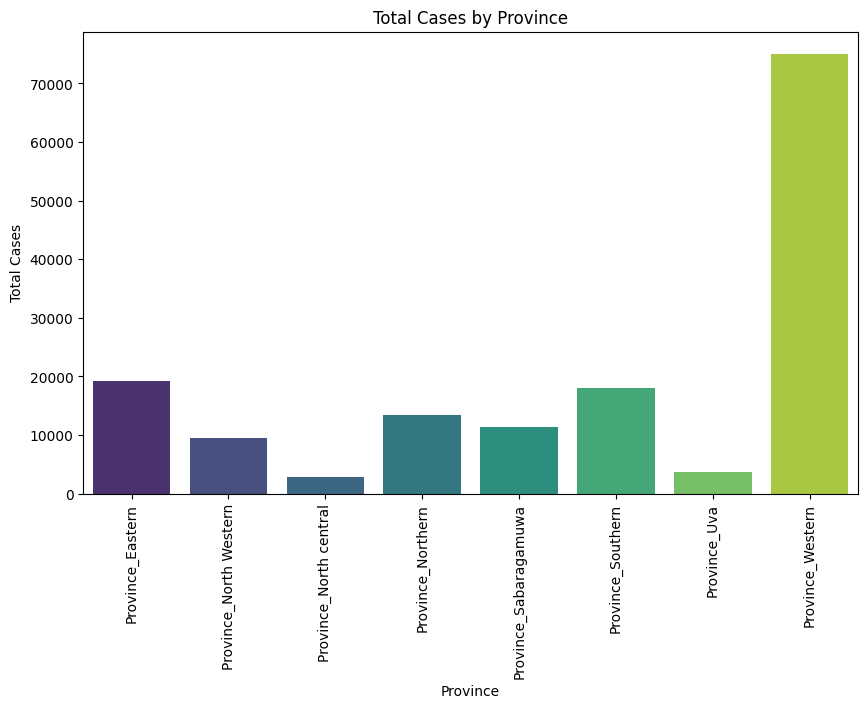

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total Cases', data=province_cases, palette='viridis')
plt.title('Total Cases by Province')
plt.xlabel('Province')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.show()

<ipython-input-14-1871144918>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Total Cases', data=district_cases, palette='viridis')


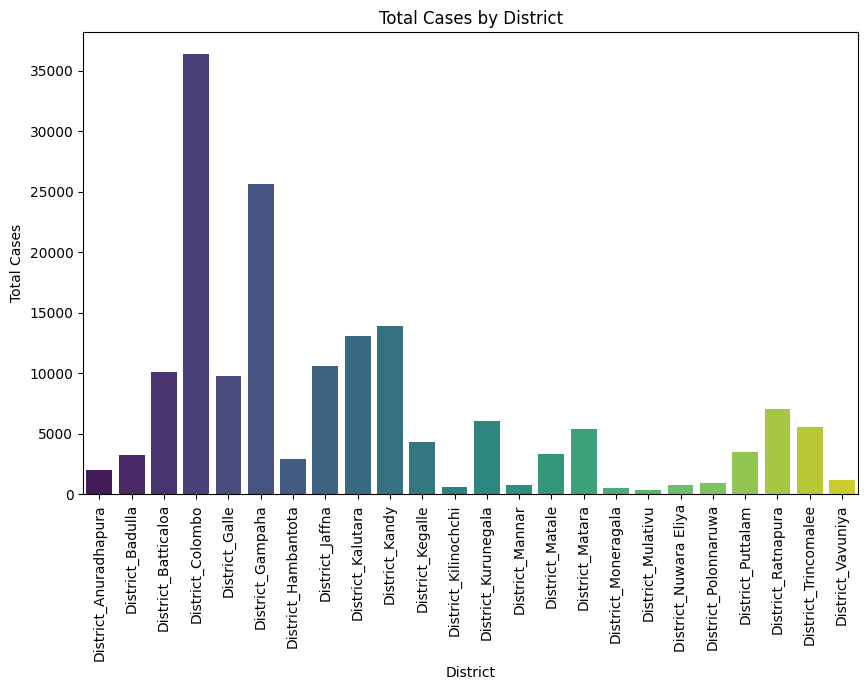

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='District', y='Total Cases', data=district_cases, palette='viridis')
plt.title('Total Cases by District')
plt.xlabel('District')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.show()

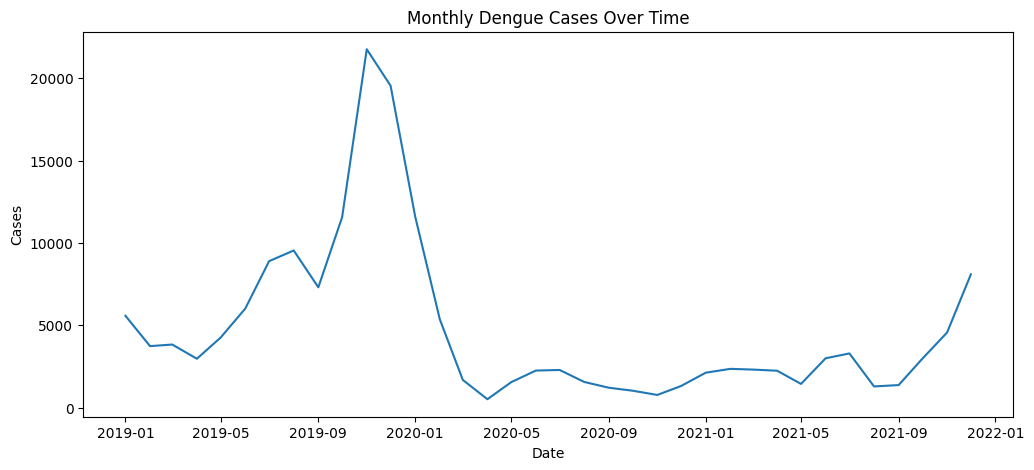

In [ ]:
monthly = df.groupby(['Year', 'Month'])['Cases'].sum().reset_index()
monthly['Date'] = pd.to_datetime(monthly[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='Date', y='Cases')
plt.title("Monthly Dengue Cases Over Time")
plt.show()

## **FEATURE ENGINEERING**

In [ ]:
df['Quarter'] = df['Month'].apply(lambda x: (x - 1) // 3 + 1)
df['Season'] = df['Month'].map({
    12:'Dry', 1:'Dry', 2:'Dry',
    3:'Wet', 4:'Wet', 5:'Wet',
    6:'Wet', 7:'Wet', 8:'Wet',
    9:'Dry', 10:'Dry', 11:'Dry'
})

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

### **RANDOM** **FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Separate features and target
X = df.drop(columns=['Cases'])   # Features
y = df['Cases']                  # Target variable

# 2. Encode categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# 3. Handle missing values (optional - RF can handle some NaNs, but it's cleaner)
X = X.fillna(0)

# 4. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 74766.59023944446
R² Score: 0.6931875057817043


In [ ]:
# Create a target variable that is shifted by 1 month into the future
df['Future_Cases'] = df['Cases'].shift(-1)

# Drop the last row (because it will have NaN in Future_Cases)
df = df.dropna()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select features (exclude original 'Cases' and future target)
X = df.drop(columns=['Cases', 'Future_Cases'])
X = pd.get_dummies(X, drop_first=True)  # Encode categorical features if any
X = X.fillna(0)  # Clean missing values if any

# Target: Next month's cases
y = df['Future_Cases']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 100285.8003866503
R² Score: 0.384364699779709


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # You can use MinMaxScaler if preferred

# Create target column: Future Cases
df.loc[:, 'Future_Cases'] = df['Cases'].shift(-1)
df = df.dropna(subset=['Future_Cases'])

# Feature preprocessing
X = df.drop(columns=['Cases', 'Future_Cases'])
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

# Target
y = df['Future_Cases']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train, transform train
X_test_scaled = scaler.transform(X_test)        # only transform test

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 93933.40985676128
R² Score: 0.43264173373991577


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Create 'Future_Cases' by shifting the target column
df.loc[:, 'Future_Cases'] = df['Cases'].shift(-1)
df = df.dropna(subset=['Future_Cases'])  # Drop last row where Future_Cases is NaN

# 2. Prepare features
X = df.drop(columns=['Cases', 'Future_Cases'])
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
X = X.fillna(0)

# 3. Prepare target
y = df['Future_Cases']

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 7. Predict and Evaluate
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 104166.172595
R² Score: 0.6641825630137905


In [ ]:
# Add lag features (1, 2, and 3 months back)
df['Cases_lag1'] = df['Cases'].shift(1)
df['Cases_lag2'] = df['Cases'].shift(2)
df['Cases_lag3'] = df['Cases'].shift(3)

# Drop rows with NaN in lagged or target column
df = df.dropna(subset=['Cases_lag1', 'Cases_lag2', 'Cases_lag3', 'Future_Cases'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features & target
X = df.drop(columns=['Cases', 'Future_Cases'])
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)
y = df['Future_Cases']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 62357.46090335196
R² Score: 0.7608939189281108


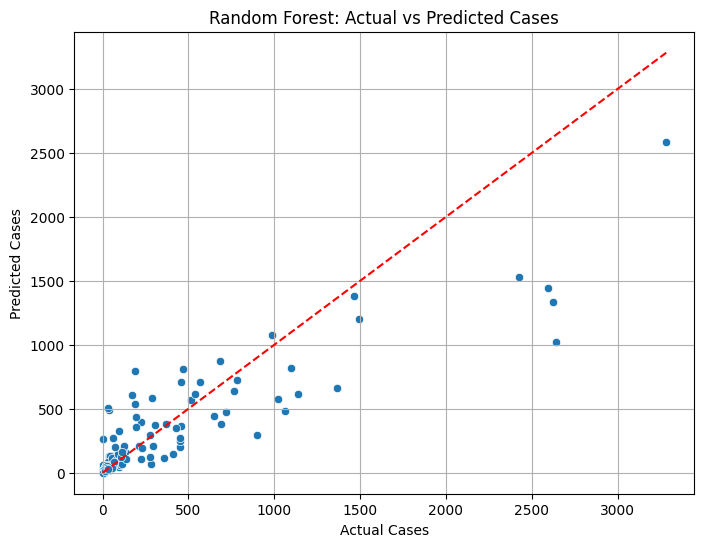

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Random Forest: Actual vs Predicted Cases")
plt.grid(True)
plt.show()

### **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

R² Score: 0.410
Mean Squared Error: 153973.091


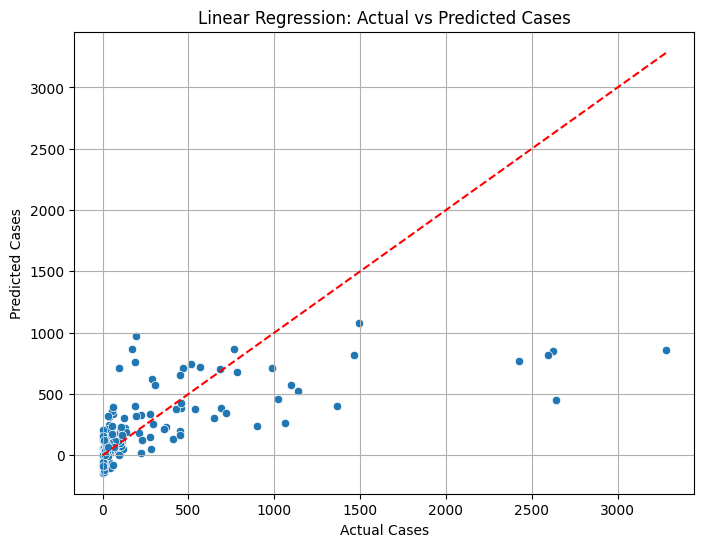

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Linear Regression: Actual vs Predicted Cases")
plt.grid(True)
plt.show()

### **XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Convert your data into DMatrix format (optional but efficient)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set model parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'seed': 42
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R² Score: {r2:.3f}")
print(f"XGBoost Mean Squared Error: {mse:.3f}")


XGBoost R² Score: 0.711
XGBoost Mean Squared Error: 75374.411


### **LIGHTGBM**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error

# Prepare datasets
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'verbose': -1
}

# Train model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Predict
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)

print(f"LightGBM R² Score: {r2:.3f}")
print(f"LightGBM Mean Squared Error: {mse:.3f}")


LightGBM R² Score: 0.588
LightGBM Mean Squared Error: 107318.586


In [ ]:
# Define base model
lgb_model = LGBMRegressor(random_state=42)

# Set hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, -1],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_child_samples': [20, 50]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit to scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print(f"Tuned R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"Tuned MSE: {mean_squared_error(y_test, y_pred):.3f}")


NameError: name 'LGBMRegressor' is not defined

### **LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error

# --- STEP 1: Prepare your dataset ---
# Assuming your original DataFrame has Year, Month, Temp_avg, Humidity_avg, Precipitation_avg, and Cases

df = df.sort_values(['Year', 'Month'])  # Chronological order

# Select features
features = ['Temp_avg', 'Humidity_avg', 'Precipitation_avg', 'Cases']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])

# --- STEP 2: Create sequences ---
sequence_length = 6  # Use 3 months to predict the 4th
X, y = [], []

for i in range(len(scaled) - sequence_length):
    X.append(scaled[i:i+sequence_length, :-1])  # All features except 'Cases'
    y.append(scaled[i+sequence_length, -1])     # Next month's 'Cases'

X = np.array(X)
y = np.array(y)

# --- STEP 3: Train-test split (no shuffle) ---
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- STEP 4: Build and train LSTM model ---
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# --- STEP 5: Evaluate ---
y_pred = model.predict(X_test).flatten()

# Inverse transform predictions and true values
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

dummy_test = np.zeros((len(y_test), len(features)))
dummy_pred = np.zeros((len(y_pred), len(features)))

dummy_test[:, -1] = y_test_reshaped[:, 0]
dummy_pred[:, -1] = y_pred_reshaped[:, 0]

y_test_inv = scaler.inverse_transform(dummy_test)[:, -1]
y_pred_inv = scaler.inverse_transform(dummy_pred)[:, -1]

r2 = r2_score(y_test_inv, y_pred)
mse = mean_squared_error(y_test, y_pred_inv)

print(f"LSTM R² Score: {r2:.3f}")
print(f"LSTM Mean Squared Error: {mse:.3f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0115 - val_loss: 0.0074
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0061
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - val_loss: 0.0058
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - val_loss: 0.0058
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0106 - val_loss: 0.0062
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0067
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0055
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - val_loss: 0.0059
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - val_loss: 0.0057
Epoch 11/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0099 - val_loss: 0.0054
Epoch 12/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0064 

### **FACEBOOK** **PROPHET**

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df has 'Year', 'Month', 'Cases'
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df_prophet = df[['ds', 'Cases']].rename(columns={'Cases': 'y'}).sort_values('ds')

# Train-test split
split_idx = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:split_idx]
test_df = df_prophet.iloc[split_idx:]

# Build and fit model
model = Prophet()
model.fit(train_df)

# Predict
future = model.make_future_dataframe(periods=len(test_df), freq='MS')
forecast = model.predict(future)

# Evaluation
forecast_test = forecast.set_index('ds').loc[test_df['ds']]
y_true = test_df['y'].values
y_pred = forecast_test['yhat'].values

# Metrics
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Prophet R² Score: {r2:.3f}")
print(f"Prophet Mean Squared Error: {mse:.3f}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdok13heb/g9atxv0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdok13heb/dyt3dhvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55540', 'data', 'file=/tmp/tmpdok13heb/g9atxv0l.json', 'init=/tmp/tmpdok13heb/dyt3dhvq.json', 'output', 'file=/tmp/tmpdok13heb/prophet_modelwzah_pq9/prophet_model-20250616212739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet R² Score: -0.347
Prophet Mean Squared Error: 144056.717


## **COMPARE PROVINCE CASES TO FACTORS**

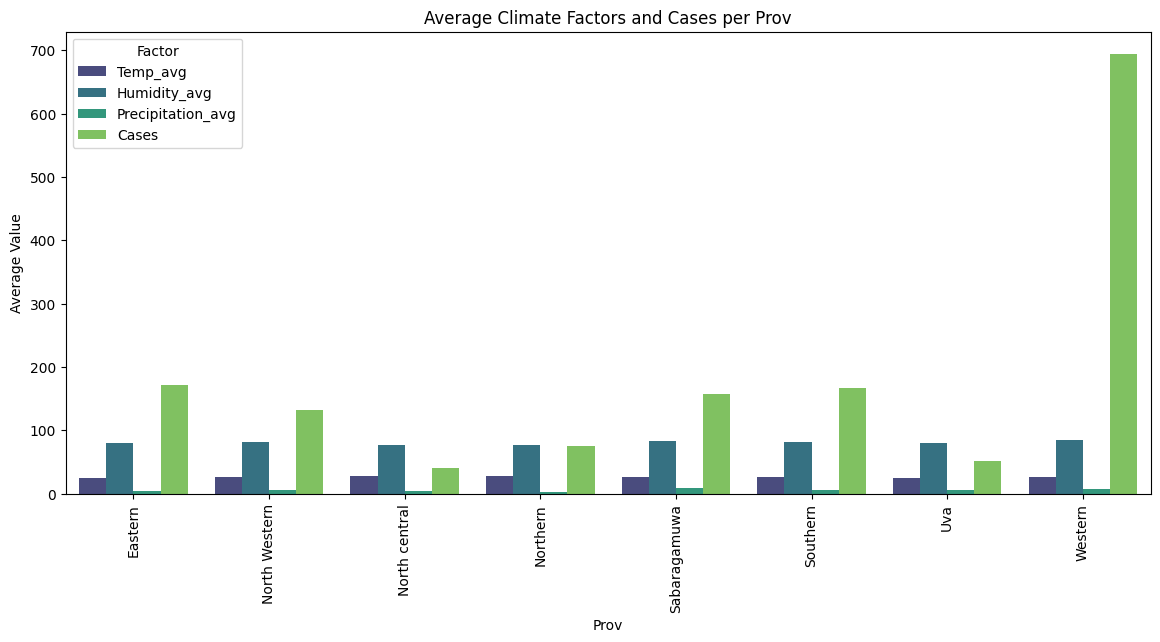

In [ ]:
df['Prov'] = df[province_columns].idxmax(axis=1).str.replace('Province_', '')
factors = df.groupby('Prov')[['Temp_avg', 'Humidity_avg', 'Precipitation_avg', 'Cases']].mean().reset_index()

# Plot side-by-side bars
factors_melted = factors.melt(id_vars='Prov', var_name='Factor', value_name='Average Value')

plt.figure(figsize=(14, 6))
sns.barplot(data=factors_melted, x='Prov', y='Average Value', hue='Factor', palette='viridis')
plt.title('Average Climate Factors and Cases per Prov')
plt.xticks(rotation=90)
plt.show()

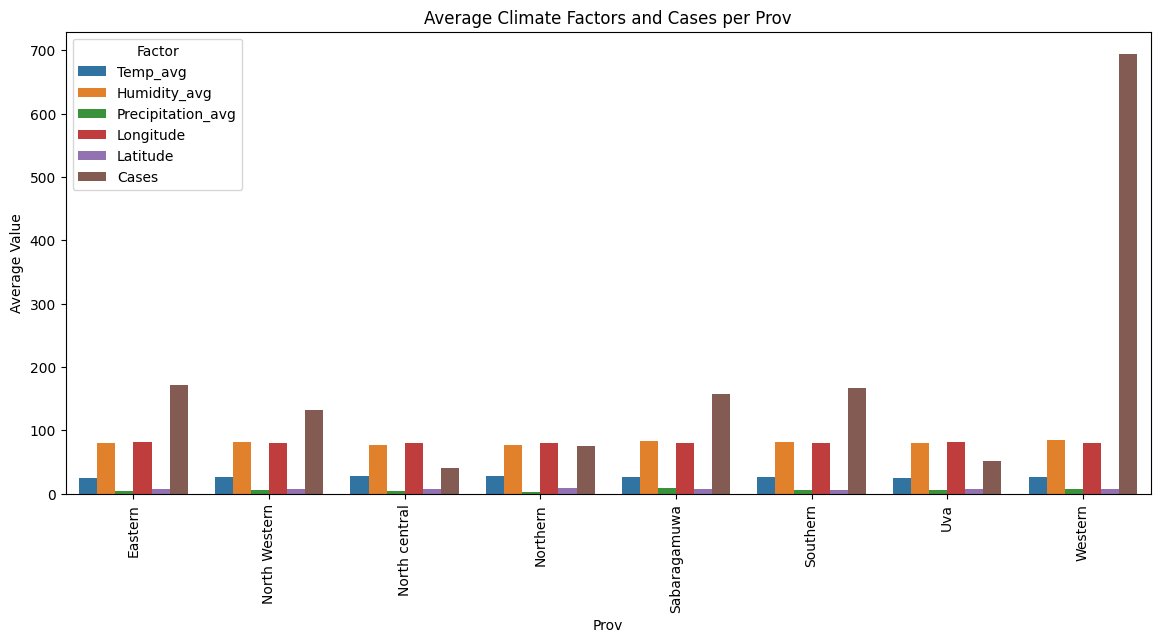

In [ ]:
df['Prov'] = df[province_columns].idxmax(axis=1).str.replace('Province_', '')
factors = df.groupby('Prov')[['Temp_avg', 'Humidity_avg', 'Precipitation_avg', 'Longitude', 'Latitude', 'Cases']].mean().reset_index()

# Plot side-by-side bars
factors_melted = factors.melt(id_vars='Prov', var_name='Factor', value_name='Average Value')

plt.figure(figsize=(14, 6))
sns.barplot(data=factors_melted, x='Prov', y='Average Value', hue='Factor', palette='tab10')
plt.title('Average Climate Factors and Cases per Prov')
plt.xticks(rotation=90)
plt.show()

### **COMPARE DISTRICT CASES TO FACTORS**

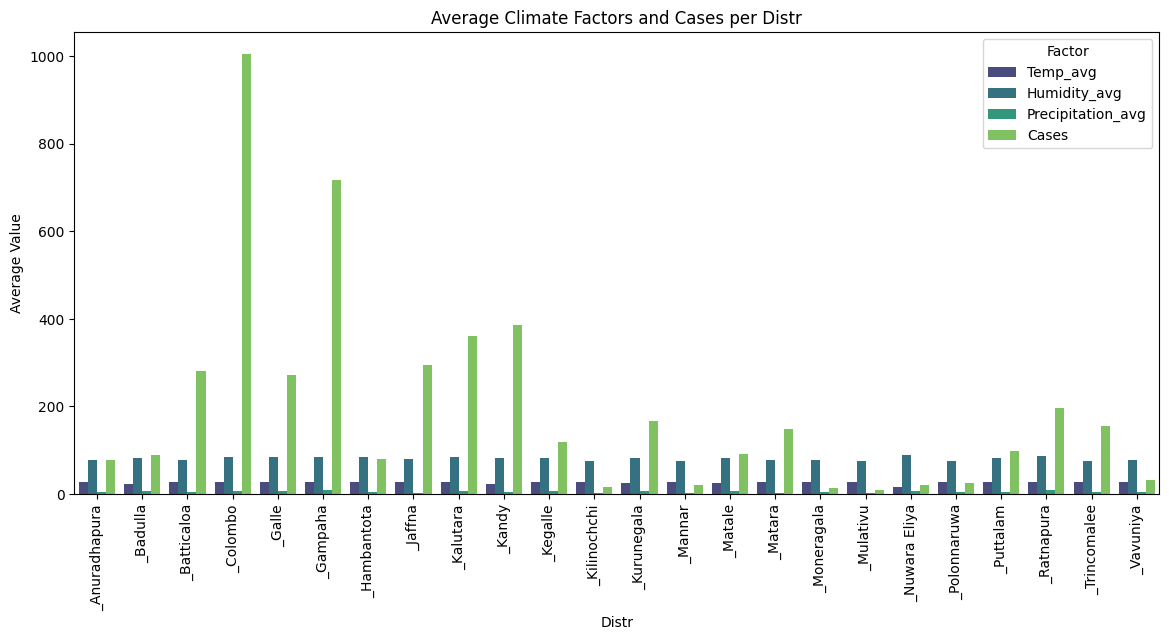

In [ ]:
df['Distr'] = df[district_columns].idxmax(axis=1).str.replace('District', '')
factors = df.groupby('Distr')[['Temp_avg', 'Humidity_avg', 'Precipitation_avg', 'Cases']].mean().reset_index()

# Plot side-by-side bars
factors_melted = factors.melt(id_vars='Distr', var_name='Factor', value_name='Average Value')

plt.figure(figsize=(14, 6))
sns.barplot(data=factors_melted, x='Distr', y='Average Value', hue='Factor', palette='viridis')
plt.title('Average Climate Factors and Cases per Distr')
plt.xticks(rotation=90)
plt.show()